<h2>
Background
</h2>
<p>
Bike-sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return back has become automatic. Through these systems, the user is able to easily rent a bike from a particular position and return back to another position. Currently, there are about over 500 bike-sharing programs around the world which are composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental, and health issues. 

Apart from interesting real-world applications of bike-sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

The bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of the week, season, the hour of the day, etc. can affect the rental behaviors. 
</p>

<h2>
Associated tasks
</h2>
<ul>
<li>Regression:</li> 
		<p>Predication of bike rental count hourly or daily based on the environmental and seasonal settings.		</p>
<br>
<li>Event and Anomaly Detection:</li>  
		<p>The count of rented bikes is also correlated to some events in the town which easily are traceable via search engines.
		For instance, a query like "2012-10-30 Washington d.c." in Google returns related results to Hurricane Sandy. Therefore the data can be used for validation of anomaly or event detection algorithms as well.</p>

</ul>

<h2>
Dataset
</h2>
<p>
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
</p>

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('data/hour.csv')

In [77]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [78]:
data.drop('instant', axis=1, inplace=True)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [80]:
data.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [81]:
data.replace({'weekday':{1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}}, inplace=True)
data.replace({'mnth':{1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}}, inplace=True)
data.replace({'season': {1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'}}, inplace=True)
data.replace({'yr': {0:'2011', 1:'2012'}}, inplace=True)

In [82]:
data.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,Jan,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h2>--- Yearly ---</h2>

In [114]:
df = data.groupby(['yr']).sum()
df


,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
yr,,,,,,,,,,,
2011,100054,239,5911,12428,4228.00,4054.5089,5562.45,1652.6842,247252,995851,1243103
2012,100617,261,5954,12342,4409.14,4213.9866,5338.16,1651.0221,372765,1676811,2049576


Text(0, 0.5, 'Count')

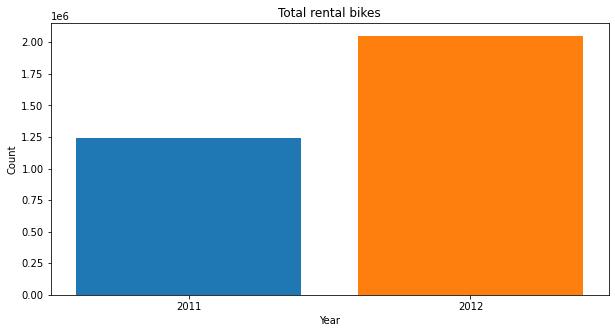

In [115]:
y = list(df.loc[:,'cnt'])
x = list(map(str, list(df.index)))

fig, ax = plt.subplots(figsize=(10,5))
label = list(map(lambda x :'n = {0}'.format(x), y))
ax.bar(x=x, height=y, label=label, color=['C0', 'C1'])
plt.title("Total rental bikes") 
plt.xlabel("Year") 
plt.ylabel("Count") 


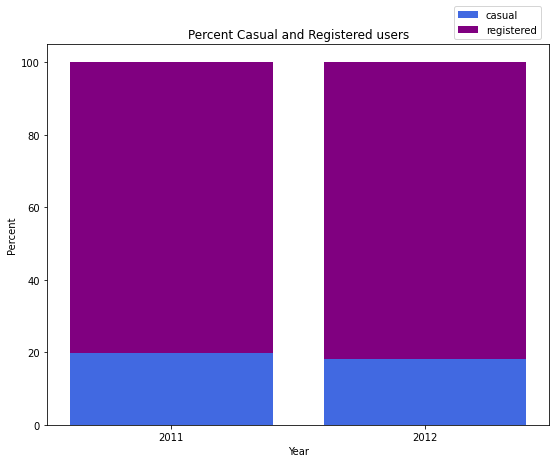

In [125]:
import matplotlib.pyplot as plt

casual = list(df.loc[:,'casual']*100/df.loc[:,'cnt'])
registered = list(df.loc[:,'registered']*100/df.loc[:,'cnt'])

# casual = list(df.loc[:,'casual'])
# registered = list(df.loc[:,'registered'])


year=['2011','2012']

plt.figure(figsize=(9,7))
plt.bar(year,casual,color="royalblue",label="casual")
plt.bar(year,registered,color="purple",bottom=np.array(casual),label="registered")

plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title("Percent Casual and Registered users")
plt.xlabel("Year")
plt.ylabel("Percent")

plt.show()


<h2>
--- Seasonal ---
</h2>

In [111]:
df = data.groupby(['season']).sum()
df.loc['Spring','sort'] = 0 
df.loc['Summer','sort'] = 1
df.loc['Autumn','sort'] =  2
df.loc['Winter','sort'] = 3
df.sort_values('sort', inplace=True)

Text(0, 0.5, 'Count')

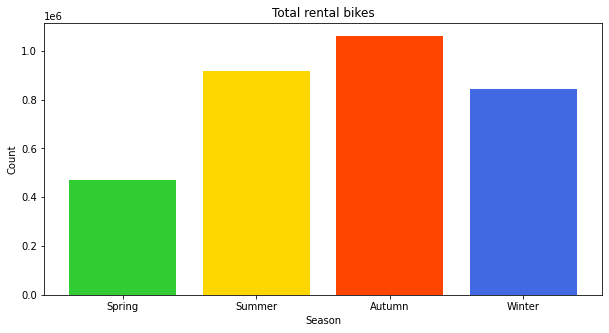

In [112]:
y = list(df.loc[:,'cnt'])
x = list(map(str, list(df.index)))

fig, ax = plt.subplots(figsize=(10,5))
label = list(map(lambda x :'n = {0}'.format(x), y))
# ax.bar(x=x, height=y, label=label, color=['C0','C1','C2','C3'])
ax.bar(x=x, height=y, label=label, color=['limegreen','gold','orangered','royalblue'])
plt.title("Total rental bikes")
plt.xlabel("Season")
plt.ylabel("Count")

<h2>--- Monthly ---</h2>

In [108]:
df = data.groupby(['mnth']).sum()

df.loc[['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],'sort'] = range(0,12)
df.sort_values('sort', inplace=True) 
df


,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sort
mnth,,,,,,,,,,,,
Jan,16715,71,907,2082,339.60,343.9261,830.15,296.5903,12042,122891,134933,0
Feb,15639,47,913,1957,402.58,403.1323,760.63,289.6041,14963,136389,151352,1
Mar,17060,0,1069,2172,575.80,563.1266,867.67,327.7673,44444,184476,228920,2
Apr,16550,48,957,2093,675.42,656.8665,845.12,336.7225,60802,208292,269094,3
May,17112,48,1032,2175,885.06,841.7050,1025.17,272.2874,75285,256401,331686,4
June,16560,0,1032,1859,985.10,919.0738,829.16,267.0047,73906,272436,346342,5
July,17112,48,984,1866,1124.14,1047.6917,889.64,247.0956,78157,266791,344948,6
Aug,16968,0,1104,1951,1045.34,961.0454,939.91,252.9160,72039,279155,351194,7
Sept,16554,48,957,2139,885.92,832.5180,1026.67,238.3354,70323,275668,345991,8


Text(0, 0.5, 'Count')

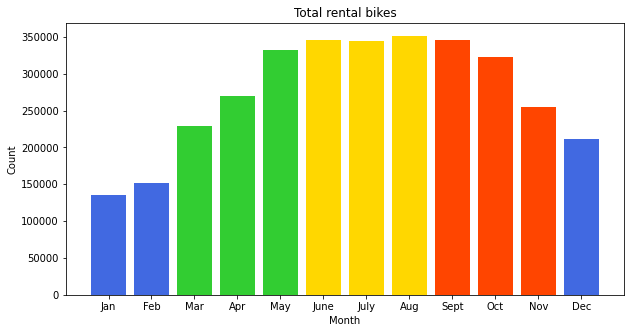

In [109]:
y = list(df.loc[:,'cnt'])
x = list(map(str, list(df.index)))

fig, ax = plt.subplots(figsize=(10,5))
label = list(map(lambda x :'n = {0}'.format(x), y))
color=['royalblue','royalblue','limegreen','limegreen','limegreen','gold','gold','gold','orangered','orangered','orangered','royalblue']
ax.bar(x=x, height=y, label=label, color=color)

plt.title("Total rental bikes") 
plt.xlabel("Month")
plt.ylabel("Count")